In [4]:
from keras.datasets import mnist

(train_data, train_target),(test_data, test_target) = mnist.load_data()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, Dropout

model = Sequential()

model.add(Flatten(input_shape = (28,28)))
#coverting the 2D image to a column vector

model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation ='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [7]:
new_train_data=train_data/255.0
new_test_data=test_data/255.0
#Normalizing the images


In [8]:
from keras.utils import np_utils

new_train_target=np_utils.to_categorical(train_target)
print(train_target[:5])
print(new_train_target[:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [9]:
train_infor=model.fit(new_train_data, new_train_target, epochs=20,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 16s 332us/sample - loss: 0.4953 - accuracy: 0.8511 - val_loss: 0.1720 - val_accuracy: 0.9517
Epoch 2/20
48000/48000 [==============================] - 14s 286us/sample - loss: 0.2461 - accuracy: 0.9325 - val_loss: 0.1328 - val_accuracy: 0.9622
Epoch 3/20
48000/48000 [==============================] - 13s 264us/sample - loss: 0.2050 - accuracy: 0.9457 - val_loss: 0.1069 - val_accuracy: 0.9707
Epoch 4/20
48000/48000 [==============================] - 13s 277us/sample - loss: 0.1728 - accuracy: 0.9518 - val_loss: 0.0986 - val_accuracy: 0.9720
Epoch 5/20
48000/48000 [==============================] - 16s 325us/sample - loss: 0.1575 - accuracy: 0.9573 - val_loss: 0.0942 - val_accuracy: 0.9728
Epoch 6/20
48000/48000 [==============================] - 15s 311us/sample - loss: 0.1470 - accuracy: 0.9604 - val_loss: 0.0945 - val_accuracy: 0.9737
Epoch 7/20
48000/48000 [====================

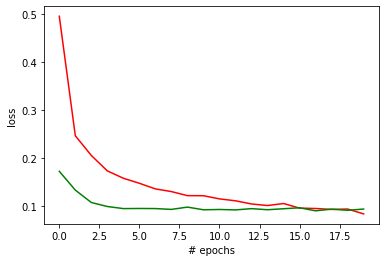

In [11]:
from matplotlib import pyplot as plt

plt.plot(train_infor.history['loss'],'r')
plt.plot(train_infor.history['val_loss'],'g')
#goal is to reduce validation loss as much as possible

plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()
# validation loss rising when loss deminishing - over fit (biased on training data)
# how to overcome - change architecture - e.g. no layers, optimizer, no of neurons
#                   early stoping, stop at the point of over fit, means at the point of validation loss starts to rise up
#                   add a drop out layer between two layers - drop out layers has probability e.g.: 0.25, inactivate 25% of the neurons in the input layer randomly, reduces the probability of becoming over fit